# Forward Stagewise GLM Debugging Notebook

Test out basic least squares regression with BoostedLinearModel class implementation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.base import clone as clone_model

from genestboost import BoostedLinearModel
from genestboost.weak_learners import SimplePLS
from genestboost.link_functions import IdentityLink
from genestboost.loss_functions import AbsoluteLoss, LeastSquaresLoss, LogCoshLoss, QuantileLoss

%matplotlib inline

### Create Fake Dataset for Regression

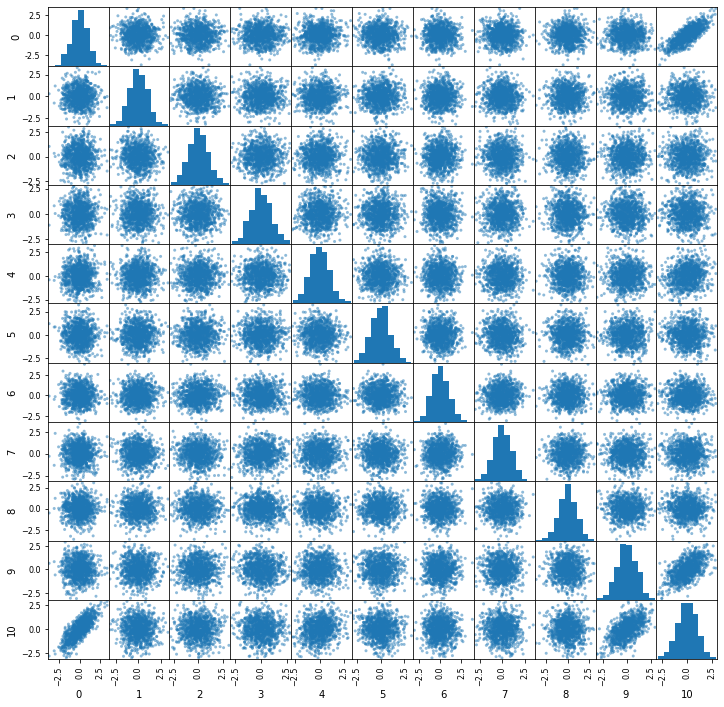

In [2]:
X, y, coef = make_regression(n_samples=1000,
                             n_features=10,
                             n_informative=3,
                             noise=6.0,
                             coef=True,
                             random_state=0)
X = scale(X)
y = scale(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pd.plotting.scatter_matrix(pd.DataFrame(np.hstack([X, y.reshape(-1, 1)])), figsize=(12, 12));

### Test 1: Identity Link with Least Squares Loss 

Number of model iterations: 11


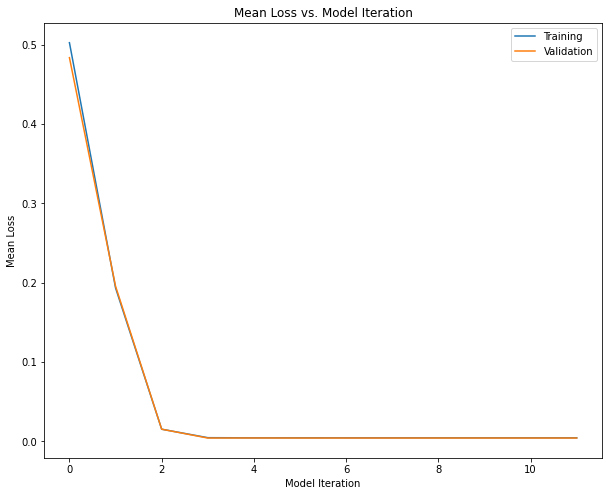

In [3]:
model = BoostedLinearModel(link=IdentityLink(),
                           loss=LeastSquaresLoss(),
                           model_callback=SimplePLS,
                           model_callback_kwargs={"max_vars":2,
                                                  "filter_threshold": 0.80},
                           alpha=1.0,
                           step_type="decaying",
                           weights="none",
                           tol=1e-10,
                           validation_fraction=0.15,
                           validation_iter_stop=5)
model.fit(X, y, iterations=200, min_iterations=10)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
pd.DataFrame(model.get_loss_history(),
             columns=["Training", "Validation"]).plot(ax=ax)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

print("Number of model iterations: {:d}".format(model.get_iterations()))

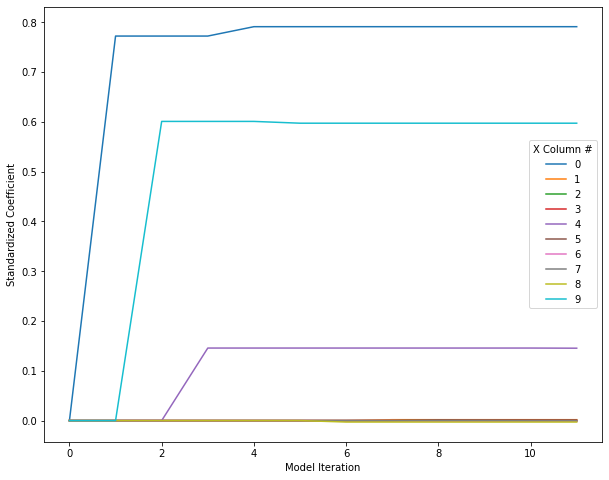

In [4]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
coef_history = pd.DataFrame(model.get_coefficient_history(scale=X.std(axis=0, ddof=1)))
coef_history.plot(ax=ax)
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Standardized Coefficient")
ax.legend(title="X Column #");

In [5]:
model.get_coefficient_order()

[0, 9, 4, 8, 1, 6, 5, 2, 3, 7]

### Test 2: Same as Test 1 but with AbsoluteLoss

Number of model iterations: 12


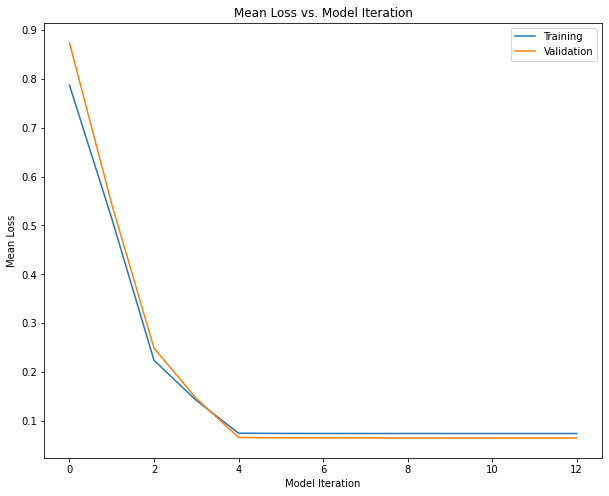

In [6]:
model = BoostedLinearModel(link=IdentityLink(),
                           loss=AbsoluteLoss(),
                           model_callback=SimplePLS,
                           model_callback_kwargs={"max_vars":2,
                                                  "filter_threshold": 0.80},
                           alpha=1.0,
                           step_type="decaying",
                           weights="none",
                           tol=1e-10,
                           validation_fraction=0.15,
                           validation_iter_stop=5)
model.fit(X, y, iterations=200)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
pd.DataFrame(model.get_loss_history(),
             columns=["Training", "Validation"]).plot(ax=ax)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

print("Number of model iterations: {:d}".format(model.get_iterations()))

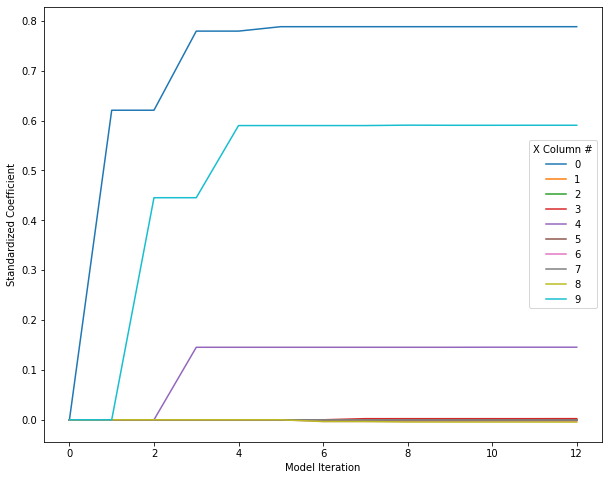

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
coef_history = pd.DataFrame(model.get_coefficient_history(scale=X.std(axis=0, ddof=1)))
coef_history.plot(ax=ax)
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Standardized Coefficient")
ax.legend(title="X Column #");

In [8]:
model.get_coefficient_order()

[0, 9, 4, 8, 6, 3, 7]

### Test 3: Same as Test 3 but with LogCoshLoss and Newton Weights

Number of model iterations: 15


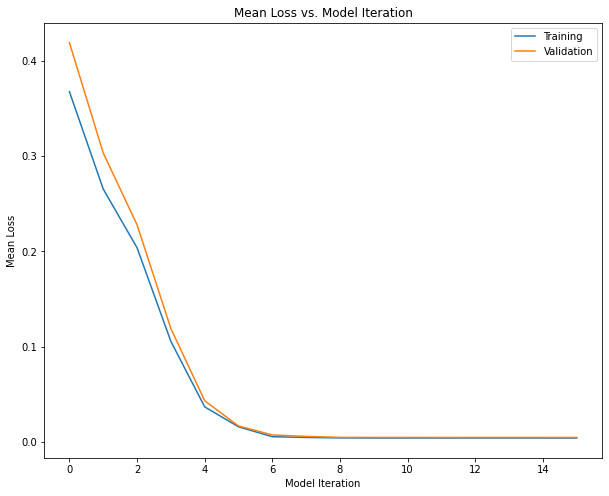

In [9]:
model = BoostedLinearModel(link=IdentityLink(),
                           loss=LogCoshLoss(),
                           model_callback=SimplePLS,
                           model_callback_kwargs={"max_vars":2,
                                                  "filter_threshold": 0.80},
                           alpha=1.0,
                           step_type="decaying",
                           weights="newton",
                           tol=1e-10,
                           validation_fraction=0.15,
                           validation_iter_stop=5)
model.fit(X, y, iterations=200)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
pd.DataFrame(model.get_loss_history(),
             columns=["Training", "Validation"]).plot(ax=ax)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

print("Number of model iterations: {:d}".format(model.get_iterations()))

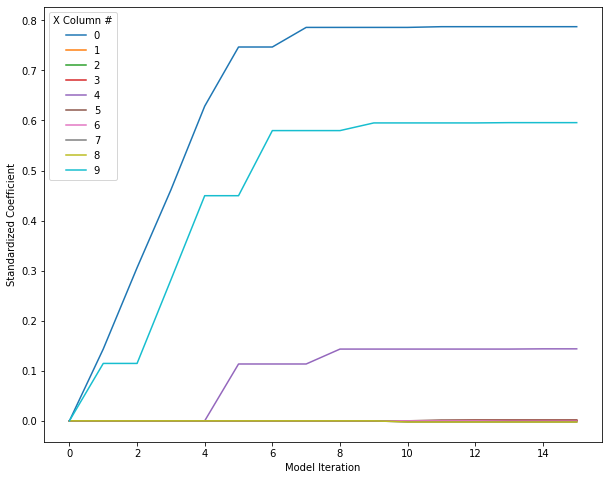

In [10]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
coef_history = pd.DataFrame(model.get_coefficient_history(scale=X.std(axis=0, ddof=1)))
coef_history.plot(ax=ax)
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Standardized Coefficient")
ax.legend(title="X Column #");

In [11]:
model.get_coefficient_order()

[0, 9, 4, 7, 8, 5, 3, 6, 2]

### Test 4: Same as Test 3 but with the 95% Quantile

Number of model iterations: 26


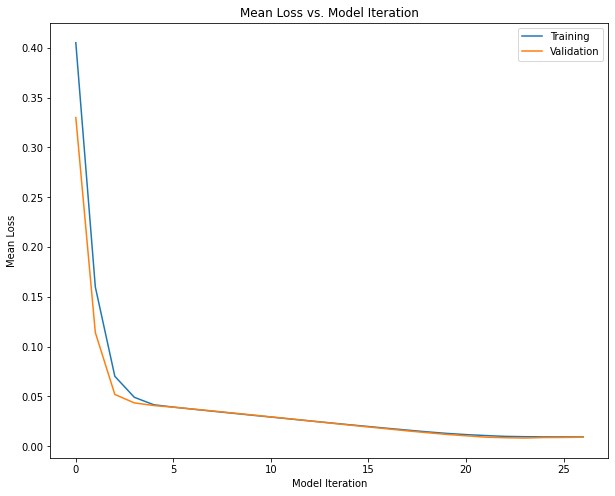

In [12]:
model = BoostedLinearModel(link=IdentityLink(),
                           loss=QuantileLoss(p=0.95),
                           model_callback=SimplePLS,
                           model_callback_kwargs={"max_vars":2,
                                                  "filter_threshold": 0.80},
                           alpha=1.0,
                           step_type="decaying",
                           weights="none",
                           tol=1e-10,
                           validation_fraction=0.15,
                           validation_iter_stop=5)
model.fit(X, y, iterations=200)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
pd.DataFrame(model.get_loss_history(),
             columns=["Training", "Validation"]).plot(ax=ax)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

print("Number of model iterations: {:d}".format(model.get_iterations()))

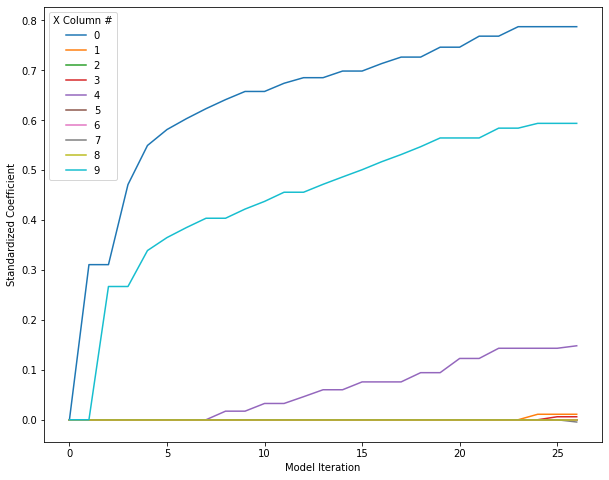

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
coef_history = pd.DataFrame(model.get_coefficient_history(scale=X.std(axis=0, ddof=1)))
coef_history.plot(ax=ax)
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Standardized Coefficient")
ax.legend(title="X Column #");

In [14]:
model.get_coefficient_order()

[0, 9, 4, 1, 3, 7]

### Re-do Test 1 but with more predictors and more noise

In [15]:
X, y, coef = make_regression(n_samples=10000,
                             n_features=900,
                             n_informative=25,
                             noise=15.0,
                             coef=True,
                             random_state=0)
X = scale(X)
y = scale(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
%%time
model = BoostedLinearModel(link=IdentityLink(),
                           loss=QuantileLoss(p=0.95),
                           model_callback=SimplePLS,
                           model_callback_kwargs={"max_vars":2,
                                                  "filter_threshold": 0.80},
                           alpha=1.0,
                           step_type="decaying",
                           weights="none",
                           tol=1e-10,
                           validation_fraction=0.15,
                           validation_iter_stop=5)
model.fit(X, y, iterations=200)

CPU times: user 23.8 s, sys: 4.56 s, total: 28.3 s
Wall time: 16.8 s


In [17]:
print("First 25 Sorted Non-zero Model Coefficients as picked up by model:")
np.sort(np.array(model.get_coefficient_order())[:25])

First 25 Sorted Non-zero Model Coefficients as picked up by model:


array([  7,  16,  36,  56,  96, 113, 118, 212, 297, 301, 303, 364, 396,
       409, 429, 489, 547, 558, 624, 661, 672, 765, 833, 871, 897])

In [18]:
print("Actual non-zero coefficients:")
np.nonzero(coef)[0]

Actual non-zero coefficients:


array([  7,  16,  36,  56,  96, 113, 118, 212, 297, 301, 303, 364, 396,
       409, 429, 489, 547, 558, 624, 661, 672, 765, 833, 871, 897])